## Instructions
Complete all **Exercises**, and submit answers to **Questions** on the Coursera 
platform.

In August of 2012, news outlets ranging from the [Washington Post](http://www.washingtonpost.com/national/on-faith/poll-shows-atheism-on-the-rise-in-the-us/2012/08/13/90020fd6-e57d-11e1-9739-eef99c5fb285_story.html) to the [Huffington Post](http://www.huffingtonpost.com/2012/08/14/atheism-rise-religiosity-decline-in-america_n_1777031.html) ran a story about the rise of atheism in America. The source for the story was a poll that asked people, "Irrespective of whether you attend a place of worship or not, would you say you are a religious person, not a religious person or a convinced atheist?" This type of question, which asks people to classify themselves in one way or another, is common in polling and generates categorical data. In this lab we take a look at the atheism survey and explore what's at play when making inference about population proportions using categorical data.

## Getting Started

### Load packages

In this lab we will explore the data using the `dplyr` package and visualize it 
using the `ggplot2` package for data visualization. The data can be found in the
companion package for this course, `statsr`.

Let's load the packages.

In [1]:
library(statsr)
library(dplyr)
library(ggplot2)

Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix

************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### The survey

The press release for the poll, conducted by WIN-Gallup International, can be accessed [here](https://www.scribd.com/document/136318147/Win-gallup-International-Global-Index-of-Religiosity-and-Atheism-2012).

Take a moment to review the report then address the following questions.

1. How many people were interviewed for this survey? 
<ol>
<li> A poll conducted by WIN-Gallup International surveyed 51,000 people from 57 countries. </li>
<li> A poll conducted by WIN-Gallup International surveyed 52,000 people from 57 countries. </li>
<li> A poll conducted by WIN-Gallup International surveyed 51,917 people from 57 countries. </li>
<li> A poll conducted by WIN-Gallup International surveyed 51,927 people from 57 countries. </li>
</ol>

**Answer**: D. 51,927 people from 57 countries.

2. Which of the following methods were used to gather information? 
<ol>
<li> Face to face </li> 
<li> Telephone </li>
<li> Internet </li> 
<li> All of the above </li>
</ol>

**Answer**: D. All of the above.

3. True / False: In the first paragraph, several key findings are reported. These percentages appear to be **sample statistics**. 
<ol>
<li> True </li> 
<li> False </li>
</ol>

**Answer**: A. True.

4. True / False:The title of the report is "Global Index of Religiosity and Atheism". To generalize the report's findings to the global human population, we must assume that the sample was a random sample from the entire population in order to be able to generalize the results to the global human population. This seems to be a reasonable assumption.
<ol>
<li> True </li> 
<li> False </li>
</ol>

**Answer**: B. False. Is actually a reasonable assumption, the data has been gathered from different sources, by an independent and reputable pollster with the associated network around the world. Sample sizes are reasonable n=~1k per country. However the data has not been gathered from all the countries in the world, hence, it doesn't represent the global human population but the countries surveyed.

### The data

Turn your attention to Table 6 (pages 15 and 16), which reports the sample size and response percentages for all 57 countries. While this is a useful format to summarize the data, we will base our analysis on the original data set of individual responses to the survey. Load this data set into R with the following command.

In [35]:
data(atheism)
head(atheism)

nationality,response,year
<fct>,<fct>,<int>
Afghanistan,non-atheist,2012
Afghanistan,non-atheist,2012
Afghanistan,non-atheist,2012
Afghanistan,non-atheist,2012
Afghanistan,non-atheist,2012
Afghanistan,non-atheist,2012


5. What does each row of Table 6 correspond to? 
<ol>
<li> Countries </li> 
<li> Individual Persons </li> 
<li> Religions </li>
</ol>

**Answer**: A. Countries.

6. What does each row of `atheism` correspond to?
<ol>
<li> Countries </li> 
<li> Individual Persons </li> 
<li> Religions </li>
</ol>

**Answer**: B. Individual Persons. Each row is an observation.

To investigate the link between these two ways of organizing this data, take a look at the estimated proportion of atheists in the United States. Towards the bottom of Table 6, we see that this is 5%. We should be able to come to the same number using the `atheism` data.

Create a new dataframe called `us12` that contains only the rows in `atheism` associated with respondents to the 2012 survey from the United States:

In [3]:
us12 <- atheism %>%
  filter(nationality == "United States" , atheism$year == "2012")

7. Next, calculate the proportion of atheist responses in the United States in 2012, i.e. in `us12`. True / False: This percentage agrees with the percentage in Table~6.
<ol>
<li> True </li> 
<li> False </li>
</ol>

**Answer**: A. True. The result is exactly what is reported in Table 6.

In [7]:
# type your code for Question 7 here, and Knit
us12 %>% 
    group_by(response) %>%
    summarise(n=n())

response,n
<fct>,<int>
atheist,50
non-atheist,952


In [10]:
50/(952+50)

[1] 0.0499002

## Inference on proportions

As was hinted earlier, Table 6 provides **sample statistics**, that is, calculations made from the sample of 51,927 people. What we'd like, though, is insight into the population **population parameters**. You answer the question, "What proportion of people in your sample reported being atheists?" with a statistic; while the question "What proportion of people on earth would report being atheists" is answered with an estimate of the parameter.

The inferential tools for estimating population proportion are analogous to those used for means in the last lab: the confidence interval and the hypothesis test.

### Exercise
**Exercise**: Write out the conditions for inference to construct a 95% confidence interval for the proportion of atheists in the United States in 2012. Are you confident all conditions are met?

If the conditions for inference are reasonable, we can either calculate the standard error and construct the interval by hand, or allow the `inference` function to do it for us.

Single categorical variable, success: atheist
n = 1002, p-hat = 0.0499
95% CI: (0.0364 , 0.0634)


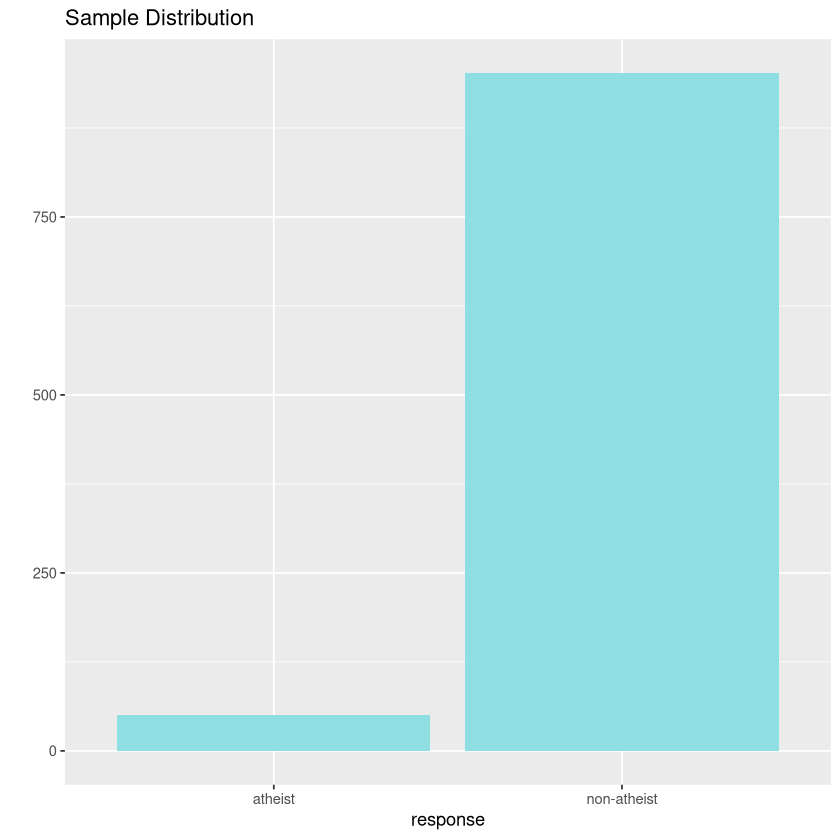

In [9]:
inference(y = response, data = us12, statistic = "proportion", 
          type = "ci", method = "theoretical", success = "atheist")

Note that since the goal is to construct an interval estimate for a proportion, it's necessary to specify what constitutes a "success", which here is a response of `atheist`.

Although formal confidence intervals and hypothesis tests don't show up in the report, suggestions of inference appear at the bottom of page 7: "In general, the error margin for surveys of this kind is $\pm$ 3-5% at 95% confidence."

### Exercise
**Exercise**: Imagine that, after reading a front page story about the latest public opinion poll, a family member asks you, "What is a margin of error?" In one sentence, and ignoring the mechanics behind the calculation, how would you respond in a way that conveys the general concept?

8. Based on the R output, what is the margin of error for the estimate of the proportion of the proportion of atheists in US in 2012? 
<ol>
<li> The margin of error for the estimate of the proportion of atheists in the US in 2012 is 0.05. </li> 
<li> The margin of error for the estimate of the proportion of atheists in the US in 2012 is 0.025. </li> 
<li> The margin of error for the estimate of the proportion of atheists in the US in 2012 is 0.0135. </li>
</ol>

**Answer**: C. The margin of error is 0.0135

In [13]:
# type your code for Question 8 here, and Knit
# CI = p +- ME, the difference between CI max and min is 2ME
CI_max_min =  0.0634 - 0.0364
ME = CI_max_min/2
ME

[1] 0.0135

### Exercise
**Exercise**: Using the inference function, calculate confidence intervals for the proportion of atheists in 2012 in two other countries of your choice, and report the associated margins of error. Be sure to note whether the conditions for inference are met. It may be helpful to create new data sets for each of the two countries first, and then use these data sets in the `inference` function to construct the confidence intervals.

Single categorical variable, success: atheist
n = 991, p-hat = 0.0706
95% CI: (0.0547 , 0.0866)


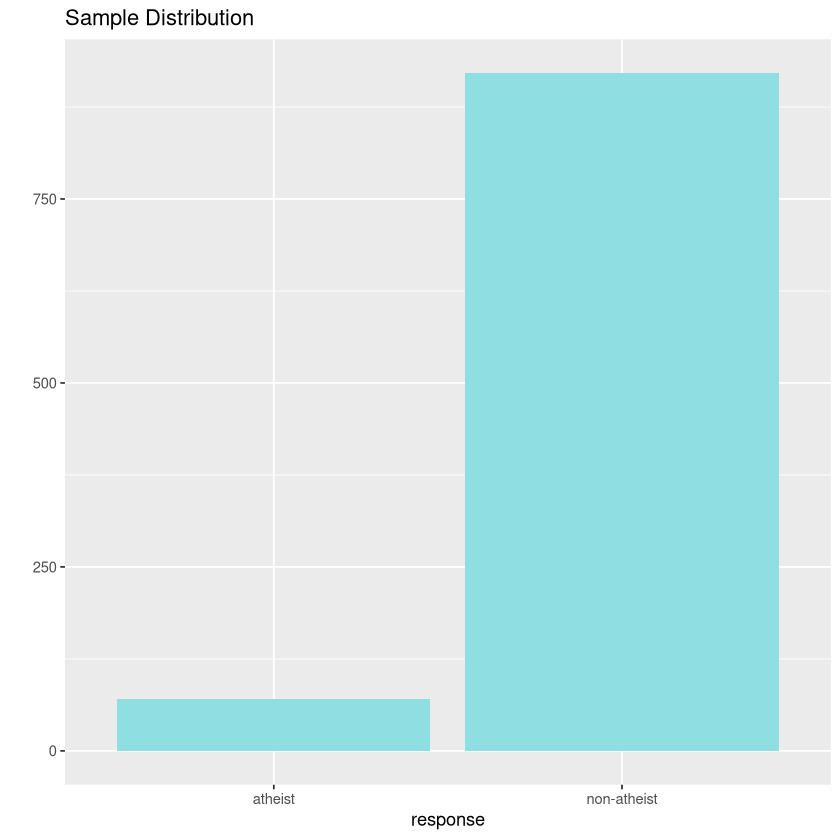

In [14]:
# type your code for the Exercise here, and Knit
ar12 <- atheism %>%
  filter(nationality == "Argentina" , atheism$year == "2012")
inference(y = response, data = ar12, statistic = "proportion", 
          type = "ci", method = "theoretical", success = "atheist")

Single categorical variable, success: atheist
n = 1002, p-hat = 0.0898
95% CI: (0.0721 , 0.1075)


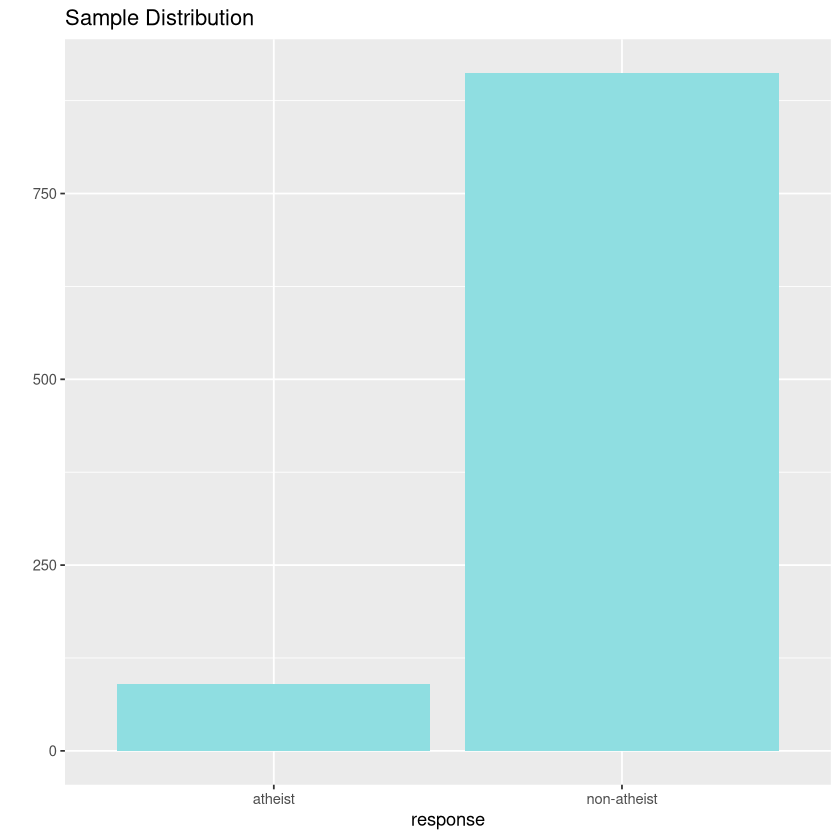

In [15]:
ca12 <- atheism %>%
  filter(nationality == "Canada" , atheism$year == "2012")
inference(y = response, data = ca12, statistic = "proportion", 
          type = "ci", method = "theoretical", success = "atheist")

## How does the proportion affect the margin of error?

Imagine you've set out to survey 1000 people on two questions: are you female? and are you left-handed? Since both of these sample proportions were calculated from the same sample size, they should have the same margin of error, right? Wrong!  While the margin of error does change with sample size, it is also affected by the proportion.

Think back to the formula for the standard error: $SE = \sqrt{p(1-p)/n}$. This is then used in the formula for the margin of error for a 95% confidence interval: $ME = 1.96\times SE = 1.96\times\sqrt{p(1-p)/n}$. Since the population proportion $p$ is in this $ME$ formula, it should make sense that the margin of error is in some way dependent on the population proportion. We can visualize this relationship by creating a plot of $ME$ vs. $p$.

The first step is to make a vector `p` that is a sequence from $0$ to $1$ with each number separated by $0.01$. We can then create a vector of the margin of error (`me`) associated with each of these values of `p` using the familiar approximate formula ($ME = 1.96 \times SE$). Lastly, we plot the two vectors against each other to reveal their relationship.

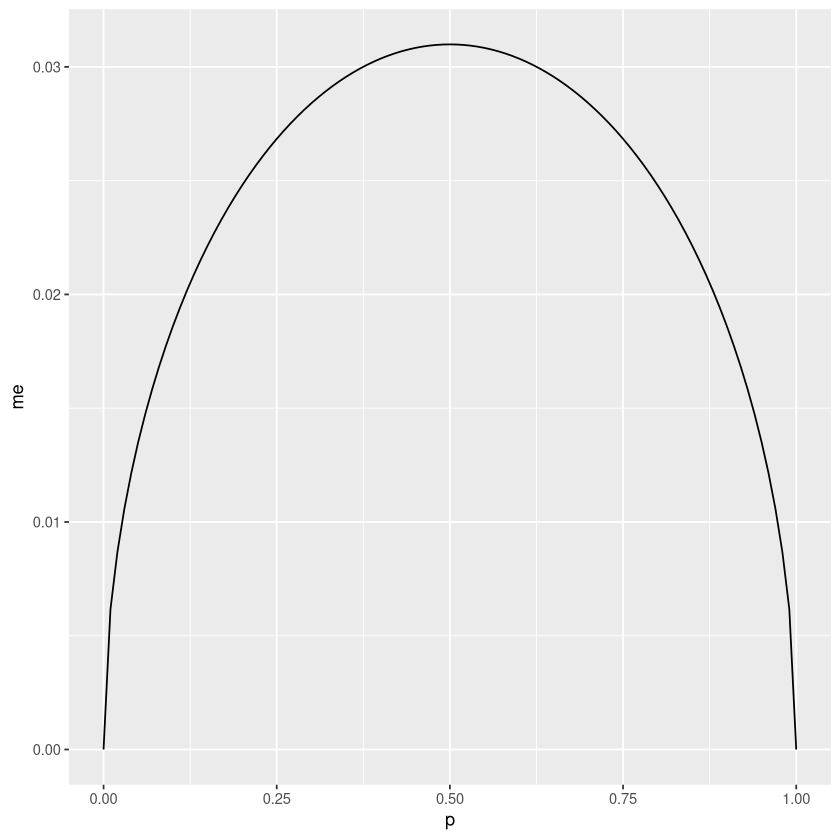

In [16]:
d <- data.frame(p <- seq(0, 1, 0.01))
n <- 1000
d <- d %>%
    mutate(me = 1.96*sqrt(p*(1 - p)/n))
    ggplot(d, aes(x = p, y = me)) +
    geom_line()

9. Which of the following is **false** about the relationship between $p$ and $ME$. 
<ol>
<li> The $ME$ reaches a minimum at $p = 0$. </li> 
<li> The $ME$ reaches a minimum at $p = 1$. </li> 
<li> The $ME$ is maximized when $p = 0.5$. </li> 
<li> The most conservative estimate when calculating a confidence interval occurs when $p$ is set to 1. </li>
</ol>

**Answer**: D. The most conservative estimate when calculating a confidence interval occurs when $p$ is set to 1. Actually the conservative calculus is setting $p = 0.5$ which has the highest $ME$

The question of atheism was asked by WIN-Gallup International in a similar survey that was conducted in 2005. We assume here that sample sizes have remained the same. Table 4 on page 13 of the report summarizes survey results from 2005 and 2012 for 39 countries.

Answer the following two questions using the `inference` function. As always, write out the hypotheses for any tests you conduct and outline the status of the conditions for inference.

10. True / False: There is convincing evidence that Spain has seen a change in its atheism index between 2005 and 2012. <br><br> *Hint:* Create a new data set for respondents from Spain. Then use their responses as the first input on the `inference`, and use `year` as the grouping variable.
<ol>
<li> True </li> 
<li> False </li>
</ol>

**Answer**: B. False. Based on the inference analysis done, there is not convincing evidence to reject $H_0$.

In [28]:
# type your code for Question 10 here, and Knit
spain <- atheism %>%
  filter(nationality == "Spain") %>%
  mutate(response=as.factor(response))

Warning message:
“Explanatory variable was numerical, it has been converted
              to categorical. In order to avoid this warning, first convert
              your explanatory variable to a categorical variable using the
              as.factor() function”


Response variable: categorical (2 levels, success: atheist)
Explanatory variable: categorical (2 levels) 
n_2005 = 1146, p_hat_2005 = 0.1003
n_2012 = 1145, p_hat_2012 = 0.09
H0: p_2005 =  p_2012
HA: p_2005 != p_2012
z = 0.8476
p_value = 0.3966

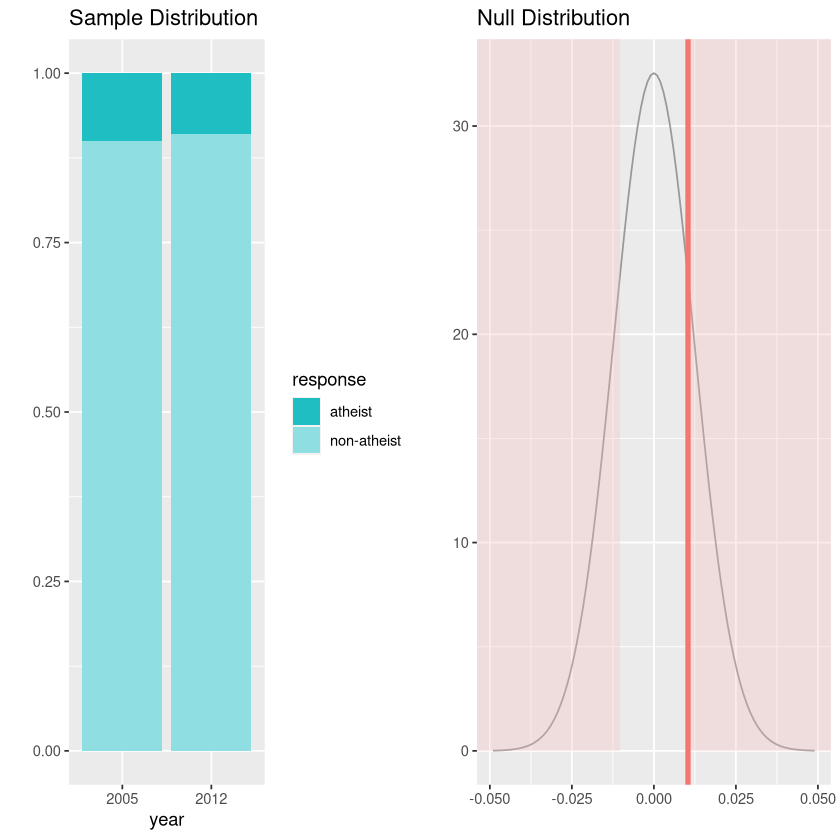

In [29]:
inference(y = response, x=year, data = spain, statistic = "proportion", type = "ht",
          null = 0, alternative = "twosided",  method = "theoretical", success = "atheist")

11. True / False: There is convincing evidence that the United States has seen a change in its atheism index between 2005 and 2012.
<ol>
<li> True </li> 
<li> False </li>
</ol>

**Answer**: A. True. the p-value is significantly < $\alpha$

Warning message:
“Explanatory variable was numerical, it has been converted
              to categorical. In order to avoid this warning, first convert
              your explanatory variable to a categorical variable using the
              as.factor() function”


Response variable: categorical (2 levels, success: atheist)
Explanatory variable: categorical (2 levels) 
n_2005 = 1002, p_hat_2005 = 0.01
n_2012 = 1002, p_hat_2012 = 0.0499
H0: p_2005 =  p_2012
HA: p_2005 != p_2012
z = -5.2431
p_value = < 0.0001

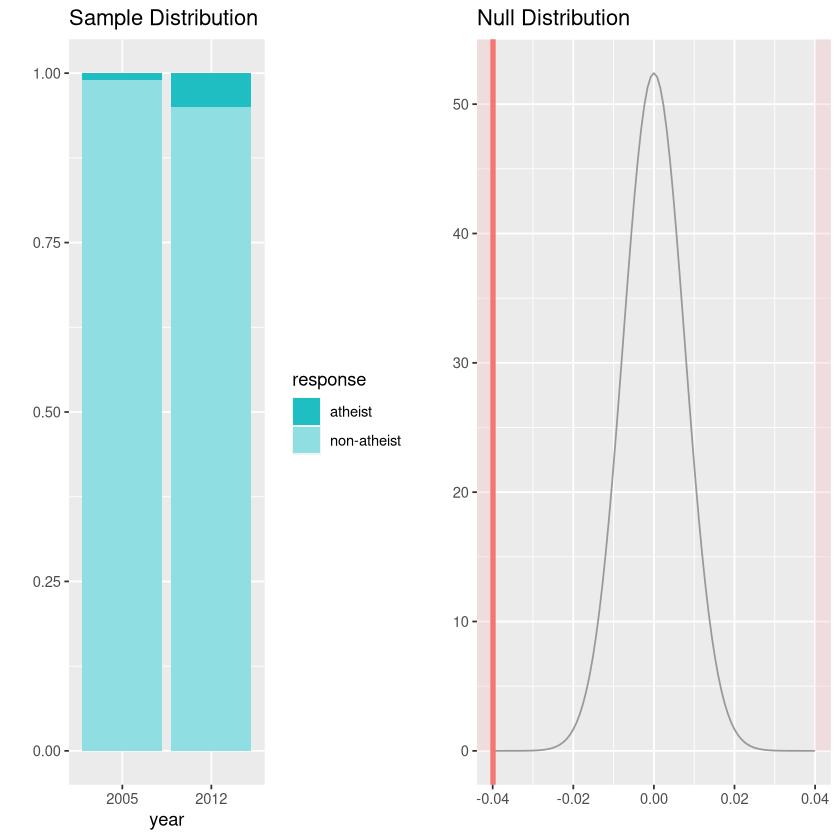

In [31]:
# type your code for Question 11 here, and Knit
us <- atheism %>%
  filter(nationality == "United States") %>%
  mutate(response=as.factor(response))
inference(y = response, x=year, data = us, statistic = "proportion", type = "ht",
          null = 0, alternative = "twosided",  method = "theoretical", success = "atheist")

12. If in fact there has been no change in the atheism index in the countries listed in Table 4, in how many of those countries would you expect to detect a change (at a significance level of 0.05) simply by chance? <br><br> *Hint:* Type 1 error.
<ol>
<li> 0 </li>
<li> 1 </li> 
<li> 1.95 </li> 
<li> 5 </li>
</ol>

**Answer**: C. 1.95. We would expect that N*$\alpha = 1.95$ countries could have gotten a change.

In [ ]:
# type your code for Question 12 here, and Knit


13. Suppose you're hired by the local government to estimate the proportion of residents that attend a religious service on a weekly basis. According to the guidelines, the estimate must have a margin of error no greater than 1% with 95% confidence. You have no idea what to expect for $p$. How many people would you have to sample to ensure that you are within the guidelines? <br><br> *Hint:* Refer to your plot of the relationship between $p$ and margin of error. Do not use the data set to answer this question.
<ol>
<li> 2401 people </li>
<li> At least 2401 people </li>
<li> 9604 people </li> 
<li> At least 9604 people </li>
</ol>

**Answer**: D. At least 9604 people, considering worst case scenario of $p=0.5$

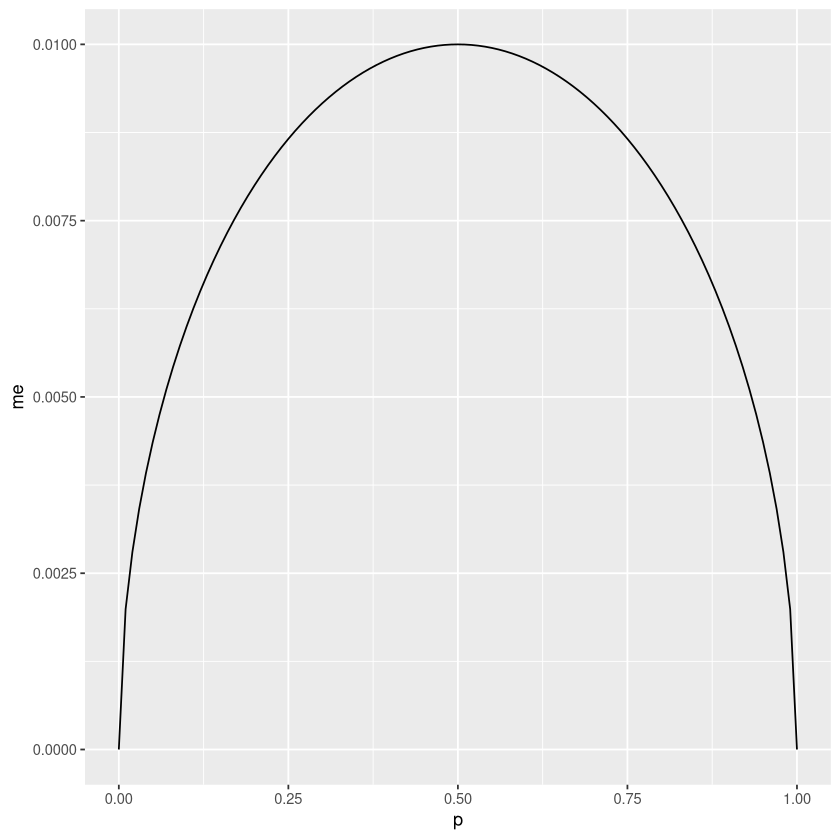

In [34]:
# type your code for Question 13 here, and Knit
d <- data.frame(p <- seq(0, 1, 0.01))
n <- 9604
d <- d %>%
    mutate(me = 1.96*sqrt(p*(1 - p)/n))
    ggplot(d, aes(x = p, y = me)) +
    geom_line()

This is a product of OpenIntro that is released under a [Creative Commons 
Attribution-ShareAlike 3.0 Unported](http://creativecommons.org/licenses/by-sa/3.0).
This lab was written for OpenIntro by Andrew Bray and Mine &Ccedil;etinkaya-Rundel.